# SGD, Adam, Adagrad, RMSprop 비교

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [2]:
# Data load
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

# 차수 변경
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# 표준화
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# L = 5
n_input = 784  # x_train 출력 값
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10   # y_train 출력 값

# 하이퍼매개변수
batch_size = 256
n_epoch = 50

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1,input_shape=(n_input,), activation = 'relu'))
    model.add(Dense(units=n_hidden2, activation = 'relu'))
    model.add(Dense(units=n_hidden3, activation = 'relu'))
    model.add(Dense(units=n_hidden4, activation = 'relu'))
    model.add(Dense(units=n_output, activation = 'softmax'))
    return model

In [4]:
def optimizer(OPT):
    model = build_model()
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer = OPT(), metrics = ['accuracy'])
    hist = model.fit(x_train,y_train, batch_size = batch_size, epochs = n_epoch, validation_data=(x_test,y_test), verbose = 2)
    return hist

In [5]:
# SGD
sgd_hist = optimizer(SGD)

Epoch 1/50
235/235 - 5s - loss: 1.3098 - accuracy: 0.6392 - val_loss: 0.8182 - val_accuracy: 0.7166
Epoch 2/50
235/235 - 5s - loss: 0.7049 - accuracy: 0.7652 - val_loss: 0.6473 - val_accuracy: 0.7842
Epoch 3/50
235/235 - 5s - loss: 0.5929 - accuracy: 0.8011 - val_loss: 0.5955 - val_accuracy: 0.7913
Epoch 4/50
235/235 - 6s - loss: 0.5455 - accuracy: 0.8133 - val_loss: 0.5351 - val_accuracy: 0.8150
Epoch 5/50
235/235 - 6s - loss: 0.5038 - accuracy: 0.8257 - val_loss: 0.5039 - val_accuracy: 0.8273
Epoch 6/50
235/235 - 5s - loss: 0.4836 - accuracy: 0.8323 - val_loss: 0.5012 - val_accuracy: 0.8232
Epoch 7/50
235/235 - 6s - loss: 0.4617 - accuracy: 0.8392 - val_loss: 0.5281 - val_accuracy: 0.8038
Epoch 8/50
235/235 - 7s - loss: 0.4469 - accuracy: 0.8443 - val_loss: 0.4843 - val_accuracy: 0.8295
Epoch 9/50
235/235 - 6s - loss: 0.4345 - accuracy: 0.8490 - val_loss: 0.4492 - val_accuracy: 0.8414
Epoch 10/50
235/235 - 6s - loss: 0.4276 - accuracy: 0.8511 - val_loss: 0.4516 - val_accuracy: 0.8415

In [6]:
# Adam
adam_hist = optimizer(Adam)

# Adagrad
Adagrad_hist = optimizer(Adagrad)

#RMSprop
RMSprop_hist = optimizer(RMSprop)

Epoch 1/50
235/235 - 6s - loss: 0.5150 - accuracy: 0.8125 - val_loss: 0.4498 - val_accuracy: 0.8251
Epoch 2/50
235/235 - 5s - loss: 0.3563 - accuracy: 0.8679 - val_loss: 0.3668 - val_accuracy: 0.8667
Epoch 3/50
235/235 - 6s - loss: 0.3192 - accuracy: 0.8822 - val_loss: 0.3837 - val_accuracy: 0.8632
Epoch 4/50
235/235 - 5s - loss: 0.2935 - accuracy: 0.8908 - val_loss: 0.3455 - val_accuracy: 0.8760
Epoch 5/50
235/235 - 5s - loss: 0.2762 - accuracy: 0.8956 - val_loss: 0.3346 - val_accuracy: 0.8776
Epoch 6/50
235/235 - 5s - loss: 0.2606 - accuracy: 0.9030 - val_loss: 0.3236 - val_accuracy: 0.8817
Epoch 7/50
235/235 - 5s - loss: 0.2463 - accuracy: 0.9066 - val_loss: 0.3654 - val_accuracy: 0.8841
Epoch 8/50
235/235 - 6s - loss: 0.2355 - accuracy: 0.9111 - val_loss: 0.3335 - val_accuracy: 0.8830
Epoch 9/50
235/235 - 5s - loss: 0.2245 - accuracy: 0.9145 - val_loss: 0.3140 - val_accuracy: 0.8890
Epoch 10/50
235/235 - 5s - loss: 0.2160 - accuracy: 0.9170 - val_loss: 0.3415 - val_accuracy: 0.8854

Epoch 33/50
235/235 - 6s - loss: 0.4088 - accuracy: 0.8586 - val_loss: 0.4478 - val_accuracy: 0.8404
Epoch 34/50
235/235 - 7s - loss: 0.4066 - accuracy: 0.8598 - val_loss: 0.4405 - val_accuracy: 0.8445
Epoch 35/50
235/235 - 8s - loss: 0.4036 - accuracy: 0.8599 - val_loss: 0.4383 - val_accuracy: 0.8440
Epoch 36/50
235/235 - 7s - loss: 0.4013 - accuracy: 0.8615 - val_loss: 0.4375 - val_accuracy: 0.8458
Epoch 37/50
235/235 - 6s - loss: 0.3994 - accuracy: 0.8619 - val_loss: 0.4362 - val_accuracy: 0.8475
Epoch 38/50
235/235 - 6s - loss: 0.3976 - accuracy: 0.8629 - val_loss: 0.4320 - val_accuracy: 0.8468
Epoch 39/50
235/235 - 7s - loss: 0.3949 - accuracy: 0.8639 - val_loss: 0.4349 - val_accuracy: 0.8445
Epoch 40/50
235/235 - 7s - loss: 0.3931 - accuracy: 0.8646 - val_loss: 0.4306 - val_accuracy: 0.8473
Epoch 41/50
235/235 - 6s - loss: 0.3907 - accuracy: 0.8653 - val_loss: 0.4341 - val_accuracy: 0.8445
Epoch 42/50
235/235 - 7s - loss: 0.3892 - accuracy: 0.8661 - val_loss: 0.4252 - val_accurac

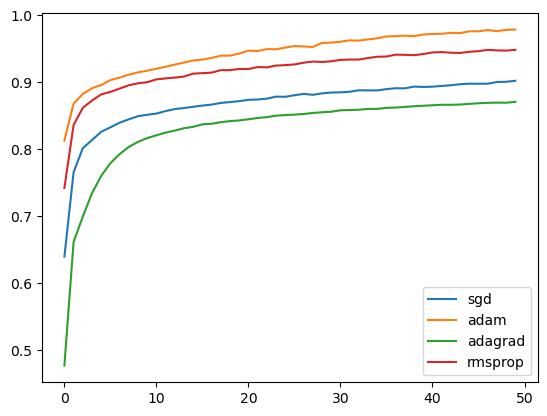

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=sgd_hist.history['accuracy'])
sns.lineplot(data=adam_hist.history['accuracy'])
sns.lineplot(data=Adagrad_hist.history['accuracy'])
sns.lineplot(data=RMSprop_hist.history['accuracy'])
plt.legend(['sgd','adam','adagrad','rmsprop',])
# sgd_hist.history['accuracy']
# adam_hist.history['accuracy']
# Adagrad_hist.history['accuracy']
# RMSprop_hist.history['accuracy']

---

In [8]:
# 교차검증을 이용한 성능비교 - colab사용
# KFold
# k = 5
# KFold(k).split(x_train)
# boxplot을 이용해서 시각화

In [10]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "0"